<a href="https://colab.research.google.com/github/tombackert/CS411-ml-for-ds/blob/main/Week_2_Data_Processing_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Data Processing and Handling Missing Values

## Objective
Learn data processing techniques and how to handle missing values using the Iris dataset.

## Instructions
1. Load the Iris dataset.
2. Explore different techniques for handling missing values.
3. Perform data normalization and standardization.
4. Visualize the processed data.


## Step 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Explore Different Techniques for Handling Missing Values

In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Introducing missing values for demonstration purposes
df_missing = df.copy()
df_missing.loc[10:20, 'sepal_length'] = np.nan

# Display rows with missing values
print("Missing values in the dataset:")
print(df_missing[df_missing['sepal_length'].isnull()])

Missing values in the dataset:
    sepal_length  sepal_width  petal_length  petal_width species
10           NaN          3.7           1.5          0.2  setosa
11           NaN          3.4           1.6          0.2  setosa
12           NaN          3.0           1.4          0.1  setosa
13           NaN          3.0           1.1          0.1  setosa
14           NaN          4.0           1.2          0.2  setosa
15           NaN          4.4           1.5          0.4  setosa
16           NaN          3.9           1.3          0.4  setosa
17           NaN          3.5           1.4          0.3  setosa
18           NaN          3.8           1.7          0.3  setosa
19           NaN          3.8           1.5          0.3  setosa
20           NaN          3.4           1.7          0.2  setosa


In [4]:
# Technique 1: Drop rows with missing values
df_dropna = df_missing.dropna()
print("\nAfter dropping rows with missing values:")
print(df_dropna.head(21))


After dropping rows with missing values:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
21           5.1          3.7           1.5          0.4  setosa
22           4.6          3.6           1.0          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
24           4.8          3.4           1.9     

In [5]:
df_dropna.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,139.000000,139.000000,139.000000,139.000000
mean,5.892086,3.012230,3.941007,1.274820
std,0.832063,0.405302,1.703526,0.740456
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.650000,0.400000
50%,5.900000,3.000000,4.500000,1.400000
75%,6.450000,3.200000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


In [6]:
# Technique 2: Fill missing values with mean
df_fillna_mean = df_missing.copy()
df_fillna_mean['sepal_length'].fillna(df_fillna_mean['sepal_length'].mean(), inplace=True)
print("\nAfter filling missing values with mean:")
print(df_fillna_mean.head(21))


After filling missing values with mean:
    sepal_length  sepal_width  petal_length  petal_width species
0       5.100000          3.5           1.4          0.2  setosa
1       4.900000          3.0           1.4          0.2  setosa
2       4.700000          3.2           1.3          0.2  setosa
3       4.600000          3.1           1.5          0.2  setosa
4       5.000000          3.6           1.4          0.2  setosa
5       5.400000          3.9           1.7          0.4  setosa
6       4.600000          3.4           1.4          0.3  setosa
7       5.000000          3.4           1.5          0.2  setosa
8       4.400000          2.9           1.4          0.2  setosa
9       4.900000          3.1           1.5          0.1  setosa
10      5.892086          3.7           1.5          0.2  setosa
11      5.892086          3.4           1.6          0.2  setosa
12      5.892086          3.0           1.4          0.1  setosa
13      5.892086          3.0           1.1      

In [7]:
df_fillna_mean.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.892086,3.057333,3.758000,1.199333
std,0.800760,0.435866,1.765298,0.762238
min,4.400000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.892086,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Technique 3: Fill missing values with median
df_fillna_median = df_missing.copy()
df_fillna_median['sepal_length'].fillna(df_fillna_median['sepal_length'].median(), inplace=True)
print("\nAfter filling missing values with median:")
print(df_fillna_median.head(21))


After filling missing values with median:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.9          3.7           1.5          0.2  setosa
11           5.9          3.4           1.6          0.2  setosa
12           5.9          3.0           1.4          0.1  setosa
13           5.9          3.0           1.1    

In [9]:
# Technique 4: Fill missing values with mode
df_fillna_mode = df_missing.copy()
df_fillna_mode['sepal_length'].fillna(df_fillna_mode['sepal_length'].mode()[0], inplace=True)
print("\nAfter filling missing values with mode:")
print(df_fillna_mode.head(21))


After filling missing values with mode:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.0          3.7           1.5          0.2  setosa
11           5.0          3.4           1.6          0.2  setosa
12           5.0          3.0           1.4          0.1  setosa
13           5.0          3.0           1.1      

## Step 3: Apply One-Hot Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the categorical 'species' column
encoder = OneHotEncoder(sparse=False)
encoded_species = encoder.fit_transform(df[['species']])
df_encoded = pd.DataFrame(encoded_species, columns=encoder.get_feature_names_out(['species']))

# Concatenate with original data
df = pd.concat([df.drop('species', axis=1), df_encoded], axis=1)

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


## Step 4: Data Normalization and Standardization

In [11]:
# Normalization using Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Standardization using Standard Scaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

## Step 5: Visualize the Processed Data

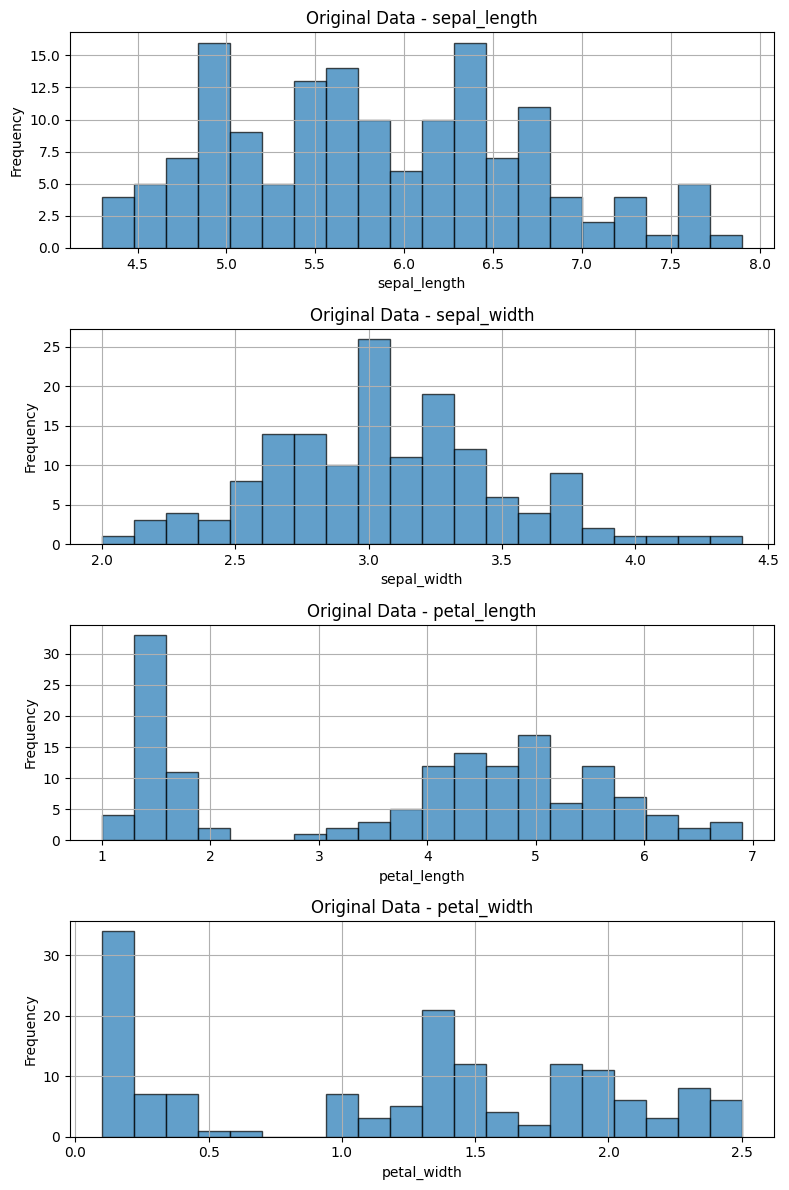

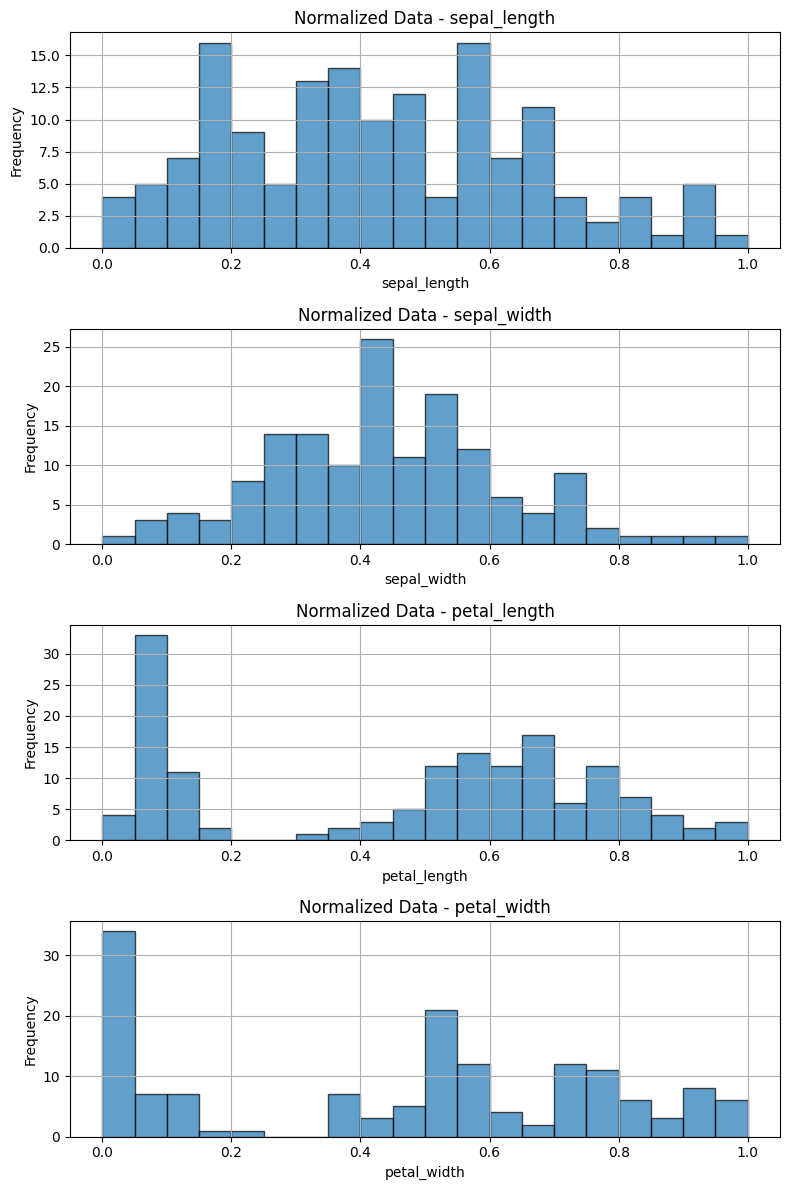

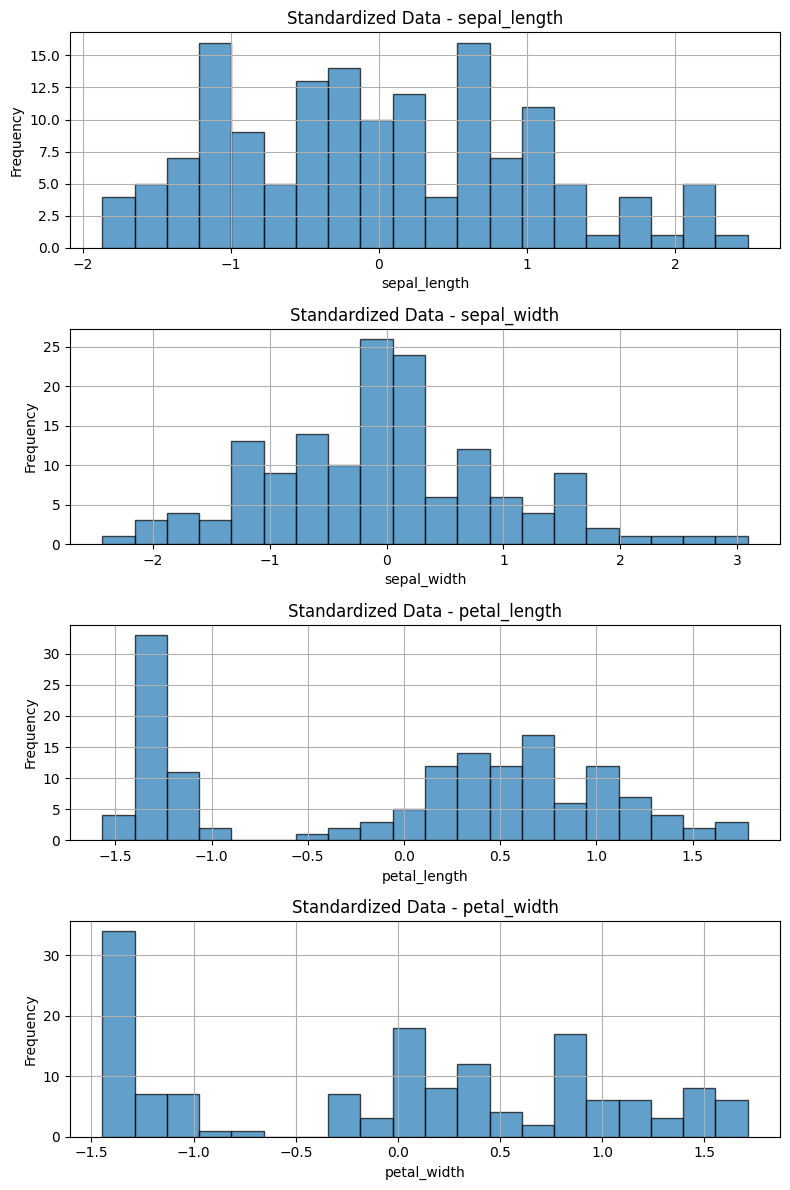

In [12]:
# Function to plot histograms for each dataset
def plot_histograms(data, title):
    fig, axes = plt.subplots(4, 1, figsize=(8, 12), tight_layout=True)
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    for i, col in enumerate(columns):
        data[col].hist(ax=axes[i], bins=20, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{title} - {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    plt.show()

plot_histograms(df, 'Original Data')
plot_histograms(df_normalized, 'Normalized Data')
plot_histograms(df_standardized, 'Standardized Data')

## Step 6: Compare 'Sepal Length' Across Different Transformations

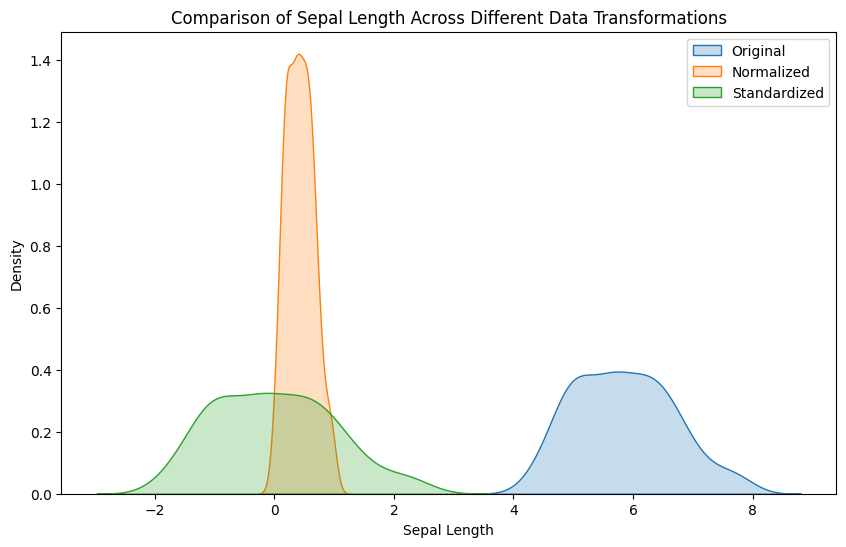

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['sepal_length'], label='Original', fill=True)
sns.kdeplot(df_normalized['sepal_length'], label='Normalized', fill=True)
sns.kdeplot(df_standardized['sepal_length'], label='Standardized', fill=True)
plt.title('Comparison of Sepal Length Across Different Data Transformations')
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.legend()
plt.show()